In [17]:
import matplotlib.pyplot as plt
import numpy as np

Revolute

In [3]:
## not considering gear ratio

# Revolute joint
#J = 0.1126 # kg*m^2 Solid Works measured
J = 2 * 1.5*(0.35**2) + (1/12)*(2*2.5)*(0.70**2) # 2*J_load * J_beam # approximated
print('J = %.4f kg*m^2' % J)
alpha = 0.4 # rad/s^2

# max alpha condition
torque = J * alpha
print('torque = %.4f N*m' % torque)
torque_g_cm = torque * 10197.16
print('torque = %.4f g*cm' % torque_g_cm)

SF = 4
print('torque with SF = %.4f N*m' % (torque * SF))
print('torque with SF = %.4f g*cm' % (torque_g_cm * SF))

J = 0.5717 kg*m^2
torque = 0.2287 N*m
torque = 2331.7506 g*cm
torque with SF = 0.9147 N*m
torque with SF = 9327.0023 g*cm


In [16]:
# radial load
m_beam = 2216.98 # g
m_beam = m_beam / 1000 # kg
g = 9.81 # m/s^2
F_radial = m_beam * g
print('F_radial = %.4f N' % F_radial)

F_radial = 21.7486 N


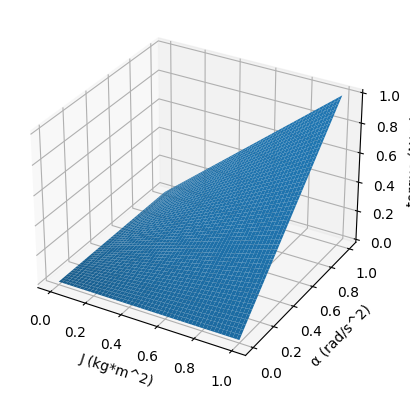

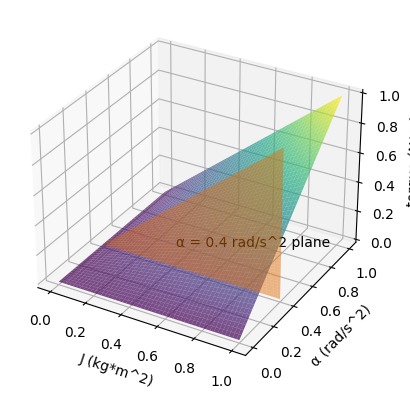

In [35]:
# plot 3d graph of required torque vs. J and alpha

J = np.linspace(0, 1, 200) # kg*m^2
alpha = np.linspace(0, 1, 200) # rad/s^2
J, alpha = np.meshgrid(J, alpha)
torque = J * alpha

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(J, alpha, torque)
ax.set_xlabel('J (kg*m^2)')
ax.set_ylabel('α (rad/s^2)')
ax.set_zlabel('torque (N*m)')
plt.show()


# also add a transparent cut plane of alpha = 0.4 rad/s^2 plane to the 3d graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(J, alpha, torque, cmap='viridis', alpha=0.7)
# create a transparent plane at alpha = 0.4 rad/s^2
alpha_plane = np.ones(J.shape) * 0.4
ax.plot_surface(J, alpha_plane, torque, alpha=0.5)

# add label for α = 0.4 rad/s^2 plane
ax.text2D(0.45, 0.36, "α = 0.4 rad/s^2 plane", transform=ax.transAxes)


ax.set_xlabel('J (kg*m^2)')
ax.set_ylabel('α (rad/s^2)')
ax.set_zlabel('torque (N*m)')
plt.show()



Prismatic

In [8]:

r_pulley = 6.37 # mm
r_pulley = r_pulley / 1000 # m
m_load  = 2 * 2 # kg # assumed

a = 250 # mm/s^2 # requirement
a /= 1000 ; print('a = ', a, 'm/s^2') # m/s^2 

torque = m_load * a * r_pulley # approx without belt tension
print('torque = %.4f N*m' % torque)
torque_g_cm = torque * 10197.16
print('torque = %.4f g*cm' % torque_g_cm)

SF = 4
print('torque with SF = %.4f N*m' % (torque * SF))
print('torque with SF = %.4f g*cm' % (torque_g_cm * SF))


a =  0.25 m/s^2
torque = 0.0064 N*m
torque = 64.9559 g*cm
torque with SF = 0.0255 N*m
torque with SF = 259.8236 g*cm


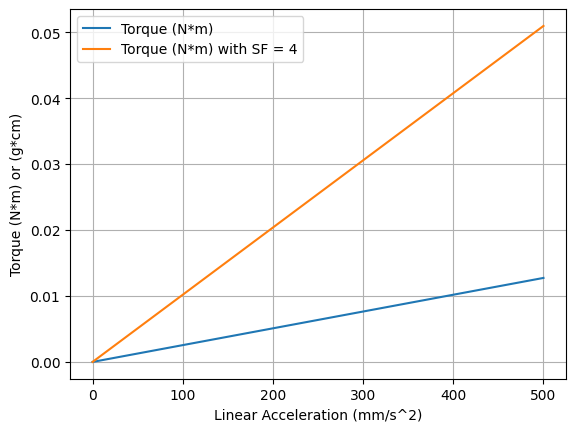

In [ ]:
# plot the torque vs linear acceleration graph

a = np.linspace(0, 500, 500) # mm/s^2
torque = m_load * (a/1000) * r_pulley # approx without belt tension
torque_g_cm = torque * 10197.16

torque_SF = torque * SF

plt.plot(a, torque, label='Torque (N*m)')
#plt.plot(a, torque_g_cm, label='torque (g*cm)')
plt.plot(a, torque_SF, label=f'Torque (N*m) with SF = {SF}')
plt.xlabel('Linear Acceleration (mm/s^2)')
plt.ylabel('Torque (N*m) or (g*cm)')
plt.legend()
plt.grid()
plt.show()

